In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def binomial(s0,sf,t,probs,r,k,tipo=0):
    u = sf[0]/s0
    d = sf[1]/s0
    t_int = int(t**(-1))
    u_disc = u#(u)**(t)
    d_disc = d#(d)**(t)
    p_til = probs[0]
    q_til = probs[1]
    Sf = []
    for i in range(t_int):
        Sf.append(s0*u_disc**(t_int-i-1)*d_disc**(i))
    
    def payoff(s):
        ## Faz um call
        if tipo == 0:
            aux = [i - k if i > k else 0 for i in Sf]
        ## Faz um put
        else:
            aux = [k - i if k > i else 0 for i in Sf]
        return aux
    
    def vprev(v_h,v_t):
        v_p = (1/(1+r))*(p_til*v_h + q_til*v_t)
        return (v_p)
    
    Vf = payoff(Sf)
    Vs = [Vf]
    
    for j in range(t_int):
        aux = []
        for i in range(len(Vs[-1])-1):
            aux.append(vprev(Vs[-1][i],Vs[-1][i+1]))
        Vs.append(aux)
    return Vs

In [3]:
## Entradas:
### s0 -> valor inicial
### sf -> array com 2 valores finais sf[0] = heads, sf[1] = tails
### t -> fração a ser dividida do tempo
### probs -> array com ptil e qtil
### r -> taxa de juros
### k -> valor de payoff do contrato
### tipo -> tipo do contrato: 0 = call, 1 = put
def binomial(s0,sf,t,probs,r,k,tipo=0):
    # definindo u e d e neutra-riscos
    u = sf[0]/s0
    d = sf[1]/s0
    p_til = probs[0]
    q_til = probs[1]
    t_int = int(t**(-1))
    
    # esperança e desvio padrão do modelo
    mi = p_til*u + q_til * d
    sig = np.sqrt(p_til*q_til*(u-d)**2)
    
    # discretizando ainda mais o tempo para garantir não arbitragem
    M0 = 1+(sig/mi)**2
    M1 = ((1+r)/mi)
    while (1-M1**t)**2 >= (M0**t-1): t = t/2

    # esperança e desvio padrão discretizados
    mi_t = mi**t
    sig_t = np.sqrt((mi**2 + sig**2)**t - (mi**2)**t) 
    # up & down & taxa de juros discretizados
    u_disc = mi_t + sig_t
    d_disc = mi_t - sig_t
    r_disc = (1+r)**t -1

    # garantia de não arbitragem
    assert(d_disc < 1+r_disc and 1+r_disc <  u_disc)
    
    # gerando os valores finais da ação
    Sf = []
    for i in range(t_int):
        Sf.append(s0*u_disc**(t_int-i-1)*d_disc**(i))
    
    # gerando os valores finais do contrato com payoff
    def payoff(s):
        ## Faz um call
        if tipo == 0:
            aux = [i - k if i > k else 0 for i in Sf]
        ## Faz um put
        else:
            aux = [k - i if k > i else 0 for i in Sf]
        return aux
    
    # metódo para calcular v_{n-1} a partir de v_{n}(H) e v_{n}(T)
    def vprev(v_h,v_t):
        v_p = (1/(1+r_disc))*(p_til*v_h + q_til*v_t)
        return (v_p)
    
    # Criando array de Valores do contrato
    Vf = payoff(Sf)
    Vs = [Vf]
    
    # percorrendo e preenchendo os valores de V até V_0
    for j in range(t_int-1):
        aux = []
        for i in range(len(Vs[-1])-1):
            aux.append(vprev(Vs[-1][i],Vs[-1][i+1]))
        Vs.append(aux)
    
    # retorna Todos os valores de contrato e os valores finais da ação
    return Vs,Sf

In [4]:
binomial(4,[8,2],1/4,[1/2,1/2],1/4,5,1)[0]

[[0, 0, 1.8789949589546282, 3.2545898715395354],
 [0.0, 0.8885218578953032, 2.427522388772923],
 [0.4201560457601976, 1.5680605106848662],
 [0.9401695625695541]]

In [5]:
def binomial(s0,sf,t,probs,r,k,tipo=0):
    u = sf[0]/s0
    d = sf[1]/s0
    p_til = probs[0]
    q_til = probs[1]
    
    mi = p_til*u + q_til * d
    sig = np.sqrt(p_til*q_til*(u-d)**2)
    
    M0 = 1+(sig/mi)**2
    M1 = ((1+r)/mi)
    while (1-M1**t)**2 >= (M0**t-1): t = t/2

    t_int = int(t**(-1))
    mi_t = mi**t
    sig_t = np.sqrt((mi**2 + sig**2)**t - (mi**2)**t) 
    u_disc = mi_t + sig_t
    d_disc = mi_t - sig_t
    r_disc = (1+r)**t -1

    assert(d_disc < 1+r_disc and 1+r_disc <  u_disc)
    
    Sf = []
    for i in range(t_int):
        print(s0*u_disc**(t_int-i-1)*d_disc**(i))
        print('---')
        Sf.append(2)
    
    def payoff(s):
        ## Faz um call
        if tipo == 0:
            aux = [i - k if i > k else 0 for i in Sf]
        ## Faz um put
        else:
            aux = [k - i if k > i else 0 for i in Sf]
        return aux
    
    def vprev(v_h,v_t):
        v_p = (1/(1+r_disc))*(p_til*v_h + q_til*v_t)
        return (v_p)
    
    Vf = payoff(Sf)
    Vs = [Vf]
    
    for j in range(t_int-1):
        aux = []
        for i in range(len(Vs[-1])-1):
            aux.append(vprev(Vs[-1][i],Vs[-1][i+1]))
        Vs.append(aux)
    return Sf

In [6]:
Sf

NameError: name 'Sf' is not defined

In [13]:
vs_call = []
vs_put = []
for n in range(1,13):
    vs_call.append(binomial(4,[8,2],1/2**n,[1/2,1/2],1/4,5,0)[0][-1])
    vs_put.append(binomial(4,[8,2],1/2**n,[1/2,1/2],1/4,5,1)[0][-1])

6.2952672117612
---
2.6490046982379596
---


TypeError: 'int' object is not subscriptable

ValueError: x and y must have same first dimension, but have shapes (12,) and (0,)

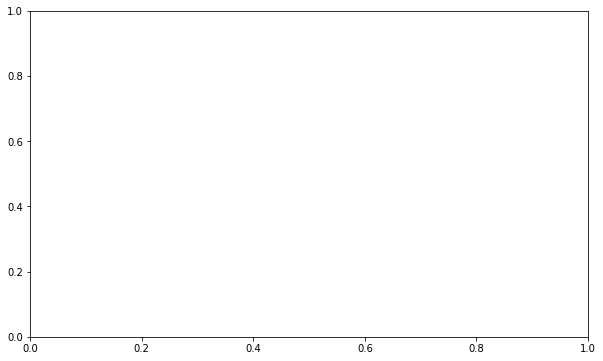

In [14]:
ns = np.linspace(1,12,12)
lbls = ['$2^{'+ str(i) + '}$' for i in range(1,13)]
plt.figure(figsize=(10,6))
plt.plot(ns,vs_call,marker='o')
plt.title('Modelo discretizado - Contrato Call')
plt.xticks(ns,labels=lbls)
plt.yticks()
plt.xlabel('Quantidade de tempos')
plt.ylabel('Valor ${V_0}$ do contrato')
plt.grid()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (12,) and (0,)

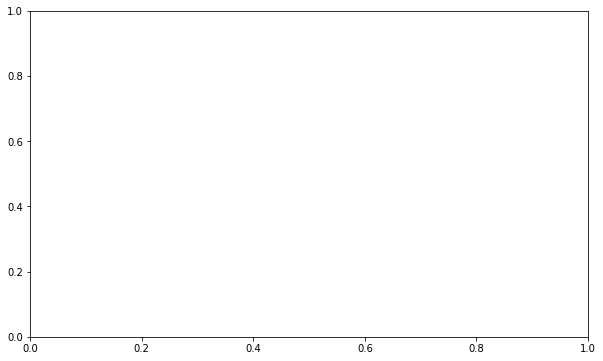

In [9]:
plt.figure(figsize=(10,6))
plt.plot(ns,vs_put,marker='o')
plt.title('Modelo discretizado - Contrato Put')
plt.xticks(ns,labels=lbls)
plt.yticks()
plt.xlabel('Quantidade de tempos')
plt.ylabel('Valor ${V_0}$ do contrato')
plt.grid()
plt.show()

In [15]:
def path_values(s0, t, u, d, probs):
    Si = s0
    S = []
    
    # definindo u e d e neutra-riscos
    p_til = probs[0]
    q_til = probs[1]
    t_int = int(t**(-1))
    
    # esperança e desvio padrão do modelo
    mi = p_til*u + q_til * d
    sig = np.sqrt(p_til*q_til*(u-d)**2)
    
    # esperança e desvio padrão discretizados
    mi_t = mi**t
    sig_t = np.sqrt((mi**2 + sig**2)**t - (mi**2)**t) 
    # up & down & taxa de juros discretizados
    u_disc = mi_t + sig_t
    d_disc = mi_t - sig_t
    
    for i in range(t_int):
        rnd = np.random.rand()
        if rnd < p_til:
            Si *= u_disc
        else:
            Si *= d_disc
        S.append(Si)
    return S

def monte_carlo(s,k,tipo=0):
    def payoff(s):
    ## Faz um call
        if tipo == 0:
             aux = [i - k if i > k else 0 for i in s]
        ## Faz um put
        else:
             aux = [k - i if k > i else 0 for i in s]
        return aux
    return payoff(s)

In [28]:
## Exemplo de Monte Carlo com t = 1/4 Call
vs_mc_call = []
for i in range(5000):
    vs_mc_call.append(monte_carlo(path_values(4,1/4,2,1/2,[1/2,1/2]),5,0))
v0_mc_call = np.mean([np.mean(i) for i in vs_mc_call])
print(v0_mc_call)

0.6801719789138774


In [30]:
## Exemplo de Monte Carlo com t = 1/4 Put
vs_mc_put = []
for i in range(5000):
    vs_mc_put.append(monte_carlo(path_values(4,1/4,2,1/2,[1/2,1/2]),5,1))
v0_mc_put = np.mean([np.mean(i) for i in vs_mc_put])
print(v0_mc_put)

1.0812221131457749


0.6974279174406363